## HOUSE PRICE PREDICTION PROJECT

In [1]:
# Import libraries
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/parikshitgurjar/Linear-Regression-Project/main/train.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum() #MISSING VALUES
#If their are more than 50% of missing values just DROP the columns.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#CHECK for missing value through heatmap :-

<AxesSubplot:>

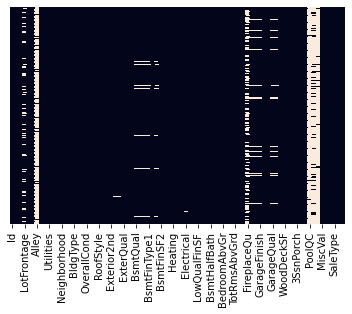

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### THIS CODE WILL SHOW ALL THE  COLUMNS WITH MISSING/NAN VALUES :-

In [7]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
df.shape

(1460, 81)

In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [11]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
df.drop(['Alley'],axis=1,inplace=True)

In [13]:
# FOR CATEGORIAL DATA WE USE MODE :

In [14]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [15]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [16]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [17]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [18]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [19]:
df.shape

(1460, 76)

In [20]:
df.drop(['Id'],axis=1,inplace=True)

In [21]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [22]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

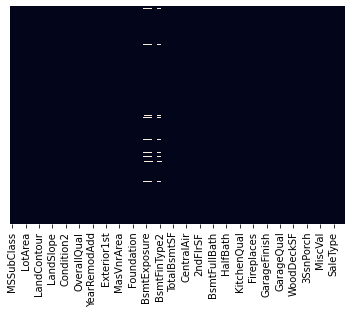

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [24]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

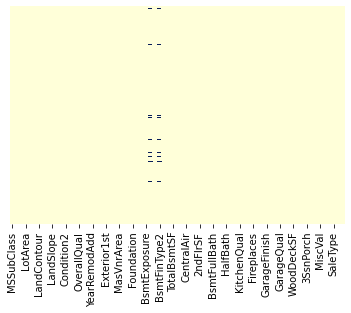

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [26]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(1422, 75)

In [29]:
df.columns[df.isnull().any()] # NO MISSING VALUES FOUND (ALL MISSING VALUES REPLACED)

Index([], dtype='object')

<AxesSubplot:>

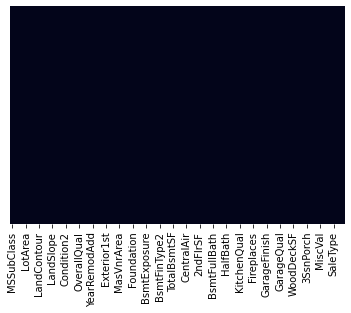

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) # ALL MISSING VALUES REMOVED

In [31]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handle Categorical Features:-

In [32]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [33]:
len(columns)

39

In [34]:
# The Below Funtion will convert all the above categorial data into one hot encodind ( dummy variables ) and
#  Also Concatenating  all the Variable 

In [35]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [36]:
main_df=df.copy()

# Combine Test Data 

In [37]:
test_df=pd.read_csv('formulatedtest.csv')

In [38]:
test_df.shape

(1459, 74)

In [39]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


# CobineTrain and Test Data :-

In [40]:
final_df=pd.concat([df,test_df],axis=0)

In [41]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [42]:
final_df.shape

(2881, 75)

In [43]:
# The below are the all the categorial columns which converted in dummy : 

In [44]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [45]:
final_df.shape

(2881, 235)

In [46]:
# REMOVING ALL THE DUPLICATE COLUMNS :

In [47]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [48]:
final_df.shape

(2881, 175)

In [49]:
# OUR DATA IS READY

In [50]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [51]:
final_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
       'Detchd', 'RFn', 'P'],
      dtype='object', length=175)

In [52]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [53]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [54]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [55]:
df_Train.shape

(1422, 175)

In [56]:
df_Test.shape

(1459, 175)

# MODEL BUILDING : MODEL TUNING:- 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from scipy.stats import randint
import xgboost as xgb
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

In [58]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)


C:\Users\AB\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


In [60]:
#XOXOXOXOXOXOXOXOXOXOXOXOX

In [61]:
from sklearn.preprocessing import LabelEncoder


X_train=X_train.apply(LabelEncoder().fit_transform)

In [62]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [63]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.25,random_state = 42)
x_train.shape,y_train.shape

((1066, 174), (1066,))

In [64]:
#MODEL EVALUATION :-

# 1.) GRADIENT BOOSTING :-

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
#Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=31).fit(x_train, y_train)
cv = cross_val_score(gbr, x_train, y_train, cv = 10)
y_pred = gbr.predict(x_test)
cv = np.mean(cv)
r2=r2_score(y_pred,y_test)
mac=mean_absolute_error(y_pred,y_test)
print("Cross val score: " + str(cv))
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mac))

Cross val score: 0.8435848143725873
R^2 score: 0.8656983843947357
Mean Absolute Erro: 16563.573284862727


In [66]:
# 2. RANDOM FOREST :-

In [67]:
#Random Forest Model
rf_model=RandomForestRegressor(bootstrap=False, max_depth=500, max_features='auto',
                       min_samples_leaf=15,criterion='mse', n_jobs=-1, random_state=18).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
cv = cross_val_score(rf_model, x_train, y_train, cv = 10)
cv=np.mean(cv)
r2=r2_score(y_pred,y_test)
me=mean_absolute_error(y_pred,y_test)
cv=np.mean(cv)
print("Cross val score: " + str(cv))
print('r2 score :' +str(r2))
print('Mean_absolute_error:'+str(me))

Cross val score: 0.7636032979649027
r2 score :0.7343853084042176
Mean_absolute_error:24723.352246621507


In [68]:
# 3.) # XGBoost Regressor

In [69]:
# XGBoost Regressor
xgb = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31).fit(x_train, y_train)
cv = cross_val_score(xgb, x_train, y_train, cv = 10)
y_pred = xgb.predict(x_test)
cv = np.mean(cv)
r2=r2_score(y_pred,y_test)
mac=mean_absolute_error(y_pred,y_test)
print("Cross val score: " + str(cv))
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mac))

Cross val score: 0.8512561845329529
R^2 score: 0.8864564298229621
Mean Absolute Error: 16115.232531601123


In [70]:
# 4.)  #Ada Boost

In [71]:
 #Ada Boost
ada=AdaBoostRegressor(n_estimators=1000,learning_rate=1,random_state=40).fit(x_train,y_train)
cv=cross_val_score(ada,x_train,y_train,cv=10)
y_pred=ada.predict(x_test)
cv=np.mean(cv)
r2=r2_score(y_pred,y_test)
mac=mean_absolute_error(y_pred,y_test)
print("Cross val score: " + str(cv))
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mac))

Cross val score: 0.78102923771516
R^2 score: 0.7073975405390245
Mean Absolute Error: 25704.949255518386


In [72]:
# 5. LINEAR REGRESSION :-

In [73]:
#Linear Regression
lr=LinearRegression(fit_intercept=True,n_jobs=-1).fit(x_train,y_train)
cv=cross_val_score(lr,x_train,y_train,cv=10)
y_pred=ada.predict(x_test)
cv=np.mean(cv)
r2=r2_score(y_pred,y_test)
mac=mean_absolute_error(y_pred,y_test)
print("Cross val score: " + str(cv))
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mac))

Cross val score: 0.8151249165797573
R^2 score: 0.7073975405390245
Mean Absolute Error: 25704.949255518386


In [74]:
#HIGHEST R SQUARED VALUE IS OBTAINED BY : XGB REGRESSOR :-

In [75]:
#SO WE WILL MAKE PREDICTION WITH XGB REGRESSOR :-

In [76]:
prediction=xgb.predict(df_Test)

In [77]:
prediction

array([126082.125, 153347.94 , 188462.34 , ..., 160894.12 , 121754.09 ,
       238987.53 ], dtype=float32)

In [80]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(prediction)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('FINAL_OUTPUT.csv',index=False)